In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Read in the data that was cleaned up previously in data_cleaning.ipynb
ins_data = pd.read_csv('ins_data_clean.csv')

In [3]:
ins_data.head()

,Unnamed: 0,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.90,0,16884.92,1,1,0,0,0,1
1,1,18,33.77,1,1725.55,0,0,0,0,1,0
2,2,28,33.00,3,4449.46,0,0,0,0,1,0
3,3,33,22.70,0,21984.47,0,0,0,1,0,0
4,4,32,28.88,0,3866.86,0,0,0,1,0,0


Let's take a look at the continuous feature variables and how they might correlate with the target variable, charges:

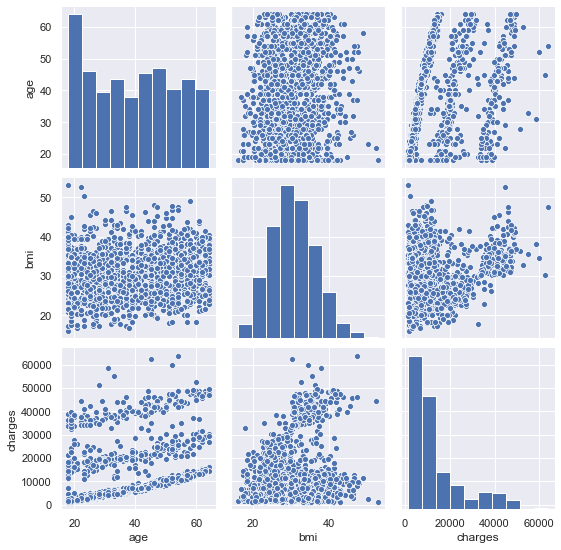

In [4]:
# Using the seaborn pairplot to visualize multiple scatter plots at once:
sns.set(style='darkgrid')
columns = ['age','bmi','charges']
sns.pairplot(ins_data[columns])

BMI and Age seem like they might have a group of positively-correlated observations with the charges amount, but they are definitely not obviously linear.

According to the CDC (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html), the normal healthy range for BMI is between 18.5 and 24.9. That means any BMI 25 and over is considered "overweight", while a BMI over 30 is "obese". Intuitively, it would make sense of charges increased as BMI did.

Let's plot some regression lines to see what they might reveal about the relationship between BMI and charges:

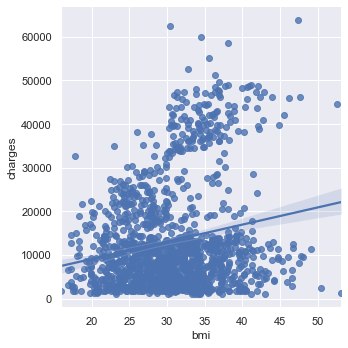

In [5]:
# Let's use the Seaborn lmplot function to see what regressing charges on to BMI produces:
sns.lmplot(x ='bmi', y ='charges', data = ins_data)

This lmplot reveals a slight positive correlation, but overall it seems that BMI alone does not seem to explain the increase in charges incurred. There is a significant amount of variance. Let's see what happens if we apply some of the other binary features as hues. Let's start with gender:

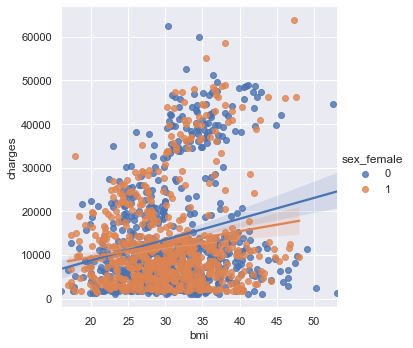

In [6]:
# Add gender as a hue using the sex_female dummy variable. 0 is male, 1 is female:
sns.lmplot(x ='bmi', y ='charges', data = ins_data, hue='sex_female')

Based on the above lmplot, gender does not seem to reveal any more useful information about the relationship between BMI and charges. Let's try smoker status next:

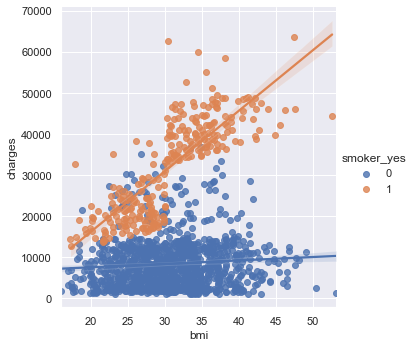

In [7]:
# Add smoker status as a hue using the smoker_yes dummy variable. 0 is non-smoker, 1 is smoker:
sns.lmplot(x ='bmi', y ='charges', data = ins_data, hue='smoker_yes')

Wow! Adding smoker status as a hue really demonstrates how important of a predictor it is when combined with BMI. Just to visualize it better, let's separate smokers and non-smoker into their own plots. We can also set the hue to use sex just to make sure nothing else jumps out:

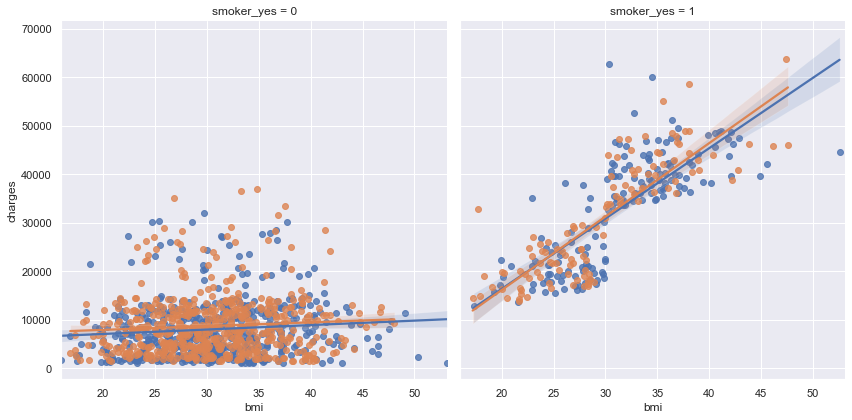

In [47]:
grid_plots = sns.FacetGrid(ins_data, col="smoker_yes", hue="sex_female", height=6, aspect=1)
grid_plots.map(sns.regplot, "bmi", "charges")

There are some definite outliers amongst both groups, especially non-smoking, but overall it's clear that being a smoker with higher BMI is correlated with significantly higher medical charges. Sex does not seem to reveal anything, as we saw before.

Next, let's look into how age factors into the charges while still keeping smokers separate since it obviously makes such a big difference:

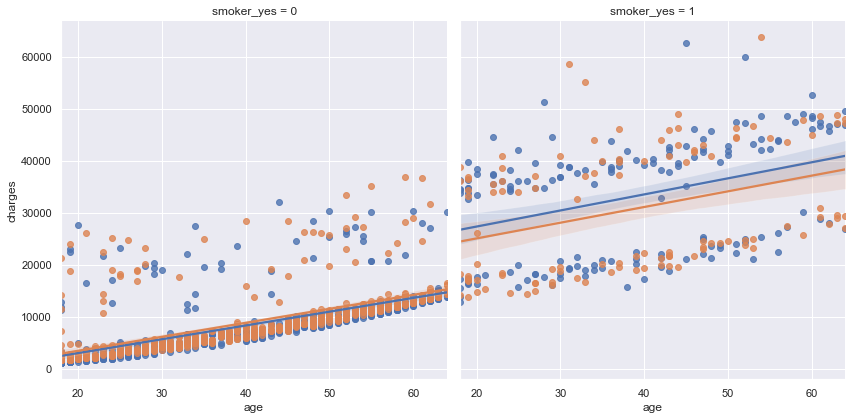

In [45]:
grid_plots = sns.FacetGrid(ins_data, col="smoker_yes", hue="sex_female", height=6, aspect=1)
grid_plots.map(sns.regplot, "age", "charges")

In [56]:
sns.barplot(x=['region_northwest','region_northeast'], y="charges", data=ins_data)

ValueError: could not broadcast input array from shape (1338,2) into shape (1338)